Reporting values to get:
* Average donation amount per contributor 
* debate periods versus non-debate periods
* Average donation amount in that last peak
* Number of contributors in peak
* Average contributors per day

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [183]:
# load data file
file_path = "/Users/mini/Documents/futurist_projects/data_files/yang_contributor_receipts_data.csv"

# read into df
df = pd.read_csv(file_path, index_col=False)

In [184]:
df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00659938,P00006486,"Yang, Andrew","XAYASANE, LIVATH",APO,AE,090120076,USAF,MILITARY,95.75,30-SEP-19,NaN,NaN,NaN,SA17A,1358975,1031239,P2020
1,C00659938,P00006486,"Yang, Andrew","WANLESS, JASON",APO,AE,090120107,ACF TECHNOLOGIES,IT SYSTEM ADMINISTRATOR,50.00,31-AUG-19,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1358975,823496,P2020
2,C00659938,P00006486,"Yang, Andrew","WANLESS, JASON",APO,AE,090120107,ACF TECHNOLOGIES,IT SYSTEM ADMINISTRATOR,1.00,16-SEP-19,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1358975,876952,P2020
3,C00659938,P00006486,"Yang, Andrew","WANLESS, JASON",APO,AE,090120107,ACF TECHNOLOGIES,IT SYSTEM ADMINISTRATOR,50.06,18-SEP-19,NaN,NaN,NaN,SA17A,1358975,1030222,P2020
4,C00659938,P00006486,"Yang, Andrew","WANLESS, JASON",APO,AE,090120107,ACF TECHNOLOGIES,IT SYSTEM ADMINISTRATOR,50.00,26-SEP-19,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1358975,951998,P2020


In [185]:
df.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd              float64
memo_text             object
form_tp               object
file_num               int64
tran_id               object
election_tp           object
dtype: object

In [186]:
pd.to_datetime(df.contb_receipt_dt.iloc[1])

Timestamp('2019-08-31 00:00:00')

In [187]:
df.contb_receipt_dt = pd.to_datetime(df.contb_receipt_dt)

In [188]:
df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00659938,P00006486,"Yang, Andrew","XAYASANE, LIVATH",APO,AE,090120076,USAF,MILITARY,95.75,2019-09-30,NaN,NaN,NaN,SA17A,1358975,1031239,P2020
1,C00659938,P00006486,"Yang, Andrew","WANLESS, JASON",APO,AE,090120107,ACF TECHNOLOGIES,IT SYSTEM ADMINISTRATOR,50.00,2019-08-31,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1358975,823496,P2020
2,C00659938,P00006486,"Yang, Andrew","WANLESS, JASON",APO,AE,090120107,ACF TECHNOLOGIES,IT SYSTEM ADMINISTRATOR,1.00,2019-09-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1358975,876952,P2020
3,C00659938,P00006486,"Yang, Andrew","WANLESS, JASON",APO,AE,090120107,ACF TECHNOLOGIES,IT SYSTEM ADMINISTRATOR,50.06,2019-09-18,NaN,NaN,NaN,SA17A,1358975,1030222,P2020
4,C00659938,P00006486,"Yang, Andrew","WANLESS, JASON",APO,AE,090120107,ACF TECHNOLOGIES,IT SYSTEM ADMINISTRATOR,50.00,2019-09-26,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1358975,951998,P2020


In [189]:
sum_by_day_df = df[['contb_receipt_dt', 'contb_receipt_amt']].groupby('contb_receipt_dt').sum().reset_index()
sum_by_day_df.head()

,contb_receipt_dt,contb_receipt_amt
0,2017-11-20,1500.0
1,2017-11-26,9100.0
2,2017-11-27,9350.0
3,2017-11-28,1000.0
4,2017-11-29,4740.0


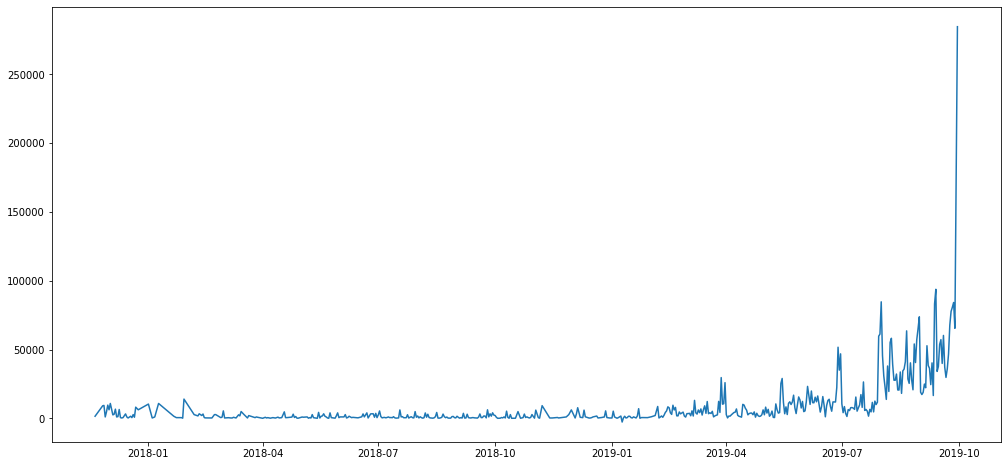

In [190]:
# plot line chart of summed contribution amounts by day

line_x = sum_by_day_df.contb_receipt_dt
line_y = sum_by_day_df.contb_receipt_amt

fig = plt.figure(figsize=(17,8))
ax = plt.axes()

plt.plot(line_x, line_y)

Debate dates:

1. June 26-27
2. July 30-31
3. September 12
4. October 15
5. November 20

In [191]:
# Final period of September, 15-30
# Average amount
# Number of contributors

# Average outside that period in 2019
# Number of contributors in 2019 minus last period
end_period_df = df[(df.contb_receipt_dt >= '9/15/2019') & (df.contb_receipt_dt <= '9/30/2019')].copy()

end_period_df.contb_receipt_amt.describe()

count    17582.000000
mean        69.966790
std        200.618975
min      -8000.000000
25%         15.000000
50%         25.000000
75%         82.950000
max       5000.000000
Name: contb_receipt_amt, dtype: float64

In [192]:
end_period_df.contb_receipt_amt.sum()

1230156.1099999999

In [193]:
# June 26-30 average contribution amount
# same unique contributor number
jun_debate_df = df[(df.contb_receipt_dt >= '6/26/2019') & (df.contb_receipt_dt <= '6/30/2019')].copy()

jun_debate_df.contb_receipt_amt.describe()

count    1472.000000
mean      113.979633
std       250.731305
min     -1100.000000
25%        24.000000
50%        50.000000
75%       100.000000
max      2800.000000
Name: contb_receipt_amt, dtype: float64

In [194]:
jun_debate_df.contb_receipt_amt.sum()

167778.02

In [195]:
# June 30 to Aug 4nd average contribution amount
# same unique contributor number
jul_debate_df = df[(df.contb_receipt_dt >= '7/30/2019') & (df.contb_receipt_dt <= '8/4/2019')].copy()

jul_debate_df.contb_receipt_amt.describe()

count    3103.000000
mean       98.189159
std       214.958182
min      -250.000000
25%        20.000000
50%        40.000000
75%       100.000000
max      2800.000000
Name: contb_receipt_amt, dtype: float64

In [196]:
jul_debate_df.contb_receipt_amt.sum()

304680.95999999996

In [197]:
# Sept 12 to 16 average contribution amount
# same unique contributor number
sept_debate_df = df[(df.contb_receipt_dt >= '9/12/2019') & (df.contb_receipt_dt <= '9/16/2019')].copy()

sept_debate_df.contb_receipt_amt.describe()

count    4825.000000
mean       62.666514
std       190.948236
min     -2800.000000
25%        10.000000
50%        25.000000
75%        50.000000
max      5000.000000
Name: contb_receipt_amt, dtype: float64

In [198]:
sept_debate_df.contb_receipt_amt.sum()

302365.93

In [199]:
df[(df.contb_receipt_amt <= 0 )]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
1399,C00659938,P00006486,"Yang, Andrew","LIN, YIQUN",FLAGSTAFF,AZ,860057014,NaN,NaN,-37.35,2019-09-18,Refund,NaN,NaN,SB28A,1358975,500006946,P2020
1400,C00659938,P00006486,"Yang, Andrew","MARQUES, EDUARDO",ORO VALLEY,AZ,857375955,NaN,NaN,-100.00,2019-07-25,Refund,NaN,NaN,SB28A,1358975,500004668,P2020
1401,C00659938,P00006486,"Yang, Andrew","MARQUES, EDUARDO",ORO VALLEY,AZ,857375955,NaN,NaN,-50.00,2019-07-25,Refund,NaN,NaN,SB28A,1358975,500004669,P2020
8838,C00659938,P00006486,"Yang, Andrew","VAN, HONG ALYCE",STANTON,CA,906803056,NaN,NaN,-21.24,2019-05-30,Refund,NaN,NaN,SB28A,1341073,500001454,P2020
8839,C00659938,P00006486,"Yang, Andrew","WEINAPPLE, ERIK",SAN RAMON,CA,945831814,NaN,NaN,-500.00,2019-06-18,Refund,NaN,NaN,SB28A,1341073,500001813,P2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50723,C00659938,P00006486,"Yang, Andrew","HEFFERNAN, CHARLES",RENTON,WA,980563437,NaN,NaN,-69.63,2019-08-19,Refund,NaN,NaN,SB28A,1358975,500006843,P2020
50724,C00659938,P00006486,"Yang, Andrew","HINZ, JOSH",SHORELINE,WA,981553864,NaN,NaN,-25.00,2019-08-09,Refund,NaN,NaN,SB28A,1358975,500006828,P2020
51815,C00659938,P00006486,"Yang, Andrew","RAN, BIN",FITCHBURG,WI,537117222,NaN,NaN,-500.64,2019-06-14,Refund,NaN,NaN,SB28A,1341073,500001804,P2020
51862,C00659938,P00006486,"Yang, Andrew","JIANG, MING TAO",WAUSAU,WI,544035195,NaN,NaN,-67.20,2019-07-19,Refund,NaN,NaN,SB28A,1358975,500004623,P2020


In [200]:
# contribution counts by debate periods
jun_count = jun_debate_df.contb_receipt_amt.describe().loc['count'] / 4
jul_count = jul_debate_df.contb_receipt_amt.describe().loc['count'] / 4
sept_count = sept_debate_df.contb_receipt_amt.describe().loc['count'] / 4
end_count = end_period_df.contb_receipt_amt.describe().loc['count'] / 15

sig_contb_counts = [jun_count, jul_count, sept_count, end_count]

In [201]:
sig_contb_counts

[368.0, 775.75, 1206.25, 1172.1333333333334]

In [202]:
# Average around debate times

jun_avg = jun_debate_df.contb_receipt_amt.describe().loc['mean']
jul_avg = jul_debate_df.contb_receipt_amt.describe().loc['mean']
sept_avg = sept_debate_df.contb_receipt_amt.describe().loc['mean']
end_avg = end_period_df.contb_receipt_amt.describe().loc['mean']

sig_contb_avgs = [jun_avg, jul_avg, sept_avg]

In [203]:
# line plot of contribution counts

counts_df = df[['contbr_city','contb_receipt_dt', 'contb_receipt_amt']].copy()
counts_df = counts_df[counts_df['contb_receipt_dt'] >= '1/1/2019']
counts_df = counts_df.groupby('contb_receipt_dt').count().reset_index()
counts_df.head()

,contb_receipt_dt,contbr_city,contb_receipt_amt
0,2019-01-01,1,1
1,2019-01-02,5,5
2,2019-01-03,1,1
3,2019-01-05,2,2
4,2019-01-06,1,1


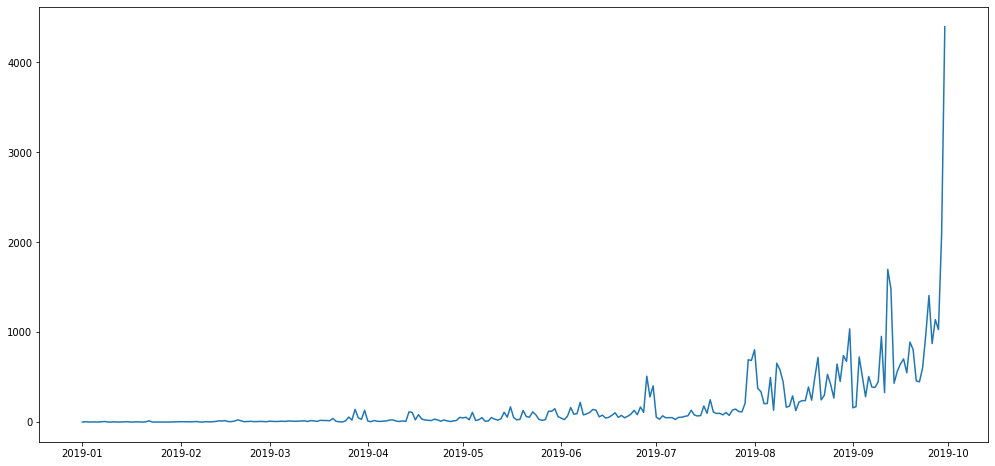

In [204]:
counts_x = counts_df.contb_receipt_dt
counts_y = counts_df.contb_receipt_amt

counts_line = plt.figure(figsize=(17,8))
counts_line_ax = plt.axes()

plt.plot(counts_x, counts_y)

<BarContainer object of 262 artists>

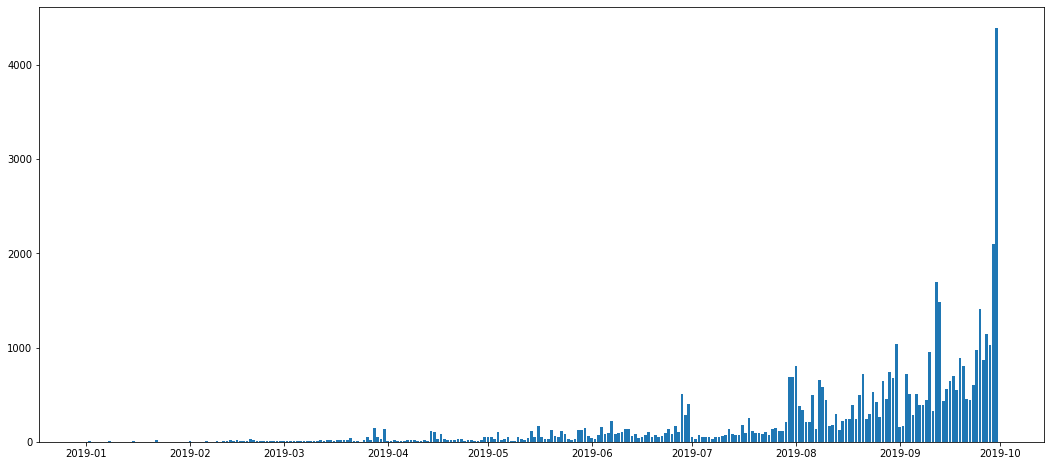

In [205]:
counts_bar = plt.figure(figsize=(18,8))
counts_bar_ax = plt.axes()

plt.bar(x=counts_x, height=counts_y)

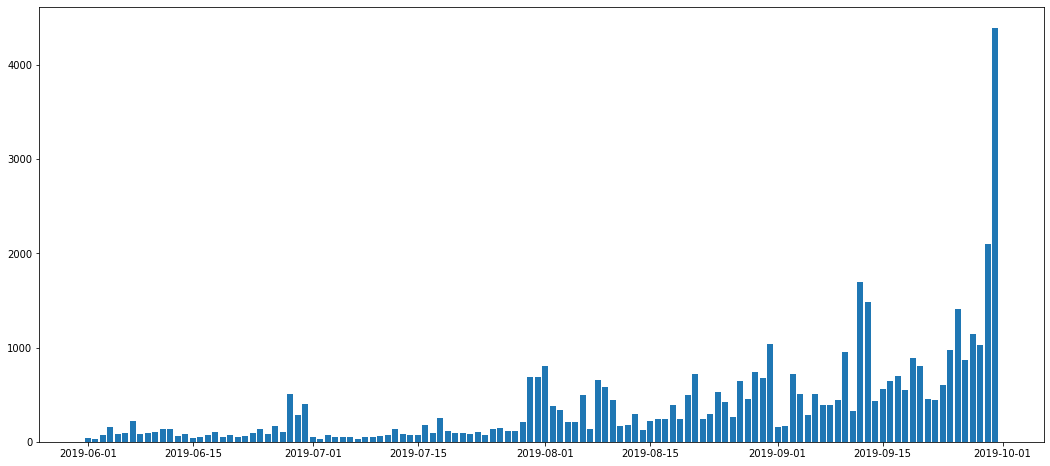

In [206]:
counts_df = counts_df[counts_df['contb_receipt_dt'] >= '6/1/2019']

recent_counts_x = counts_df.contb_receipt_dt
recent_counts_y = counts_df.contb_receipt_amt

counts_bar = plt.figure(figsize=(18,8))
counts_bar_ax = plt.axes()

plt.bar(x=recent_counts_x, height=recent_counts_y)
plt.savefig('counts_bar.jpg')

In [207]:
before_jun_debate = df[(df.contb_receipt_dt < '6/25/2019') & (df.contb_receipt_dt >='1/1/2019')].copy()
before_jul_debate = df[(df.contb_receipt_dt < '7/28/2019') & (df.contb_receipt_dt > '6/29/2019')].copy()
before_sept_debate = df[(df.contb_receipt_dt < '9/10/2019') & (df.contb_receipt_dt > '8/2/2019')].copy()

In [208]:
before_jun_debate.contb_receipt_amt.describe()

count    5830.000000
mean      166.259509
std       381.851128
min     -8000.000000
25%        20.000000
50%        50.000000
75%       170.000000
max      2800.000000
Name: contb_receipt_amt, dtype: float64

In [209]:
before_jun_debate.contb_receipt_amt.describe().loc['count'] / (30*6)

32.388888888888886

In [210]:
before_jul_debate.contb_receipt_amt.describe()

count    2825.000000
mean       93.728202
std       308.465887
min     -8000.000000
25%        20.000000
50%        35.000000
75%        92.250000
max      2800.000000
Name: contb_receipt_amt, dtype: float64

In [211]:
before_sept_debate.contb_receipt_amt.describe()

count    15268.000000
mean        86.476838
std        269.718759
min      -8000.000000
25%         15.000000
50%         25.000000
75%         69.630000
max       3000.000000
Name: contb_receipt_amt, dtype: float64

In [212]:
counts_df.drop(columns = 'contbr_city', inplace=True)

In [213]:
counts_df.head()

,contb_receipt_dt,contb_receipt_amt
140,2019-06-01,45
141,2019-06-02,28
142,2019-06-03,67
143,2019-06-04,162
144,2019-06-05,88


In [214]:
new_cols = ['date', 'count']
counts_df.rename(columns={'contb_receipt_dt': 'date', 'contb_receipt_amt': 'count'}, inplace=True)

In [215]:
counts_df.head()

,date,count
140,2019-06-01,45
141,2019-06-02,28
142,2019-06-03,67
143,2019-06-04,162
144,2019-06-05,88


In [216]:
new_file = 'yang_processed_date_counts.csv'
path = '/Users/mini/Documents/futurist_projects/data_files/'
new_file_path = path + new_file
counts_df.to_csv(new_file_path, index=False)

In [217]:
# get df of sig dates

jun_debate_df
jul_debate_df
sept_debate_df
end_period_df

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00659938,P00006486,"Yang, Andrew","XAYASANE, LIVATH",APO,AE,090120076,USAF,MILITARY,95.75,2019-09-30,NaN,NaN,NaN,SA17A,1358975,1031239,P2020
2,C00659938,P00006486,"Yang, Andrew","WANLESS, JASON",APO,AE,090120107,ACF TECHNOLOGIES,IT SYSTEM ADMINISTRATOR,1.00,2019-09-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1358975,876952,P2020
3,C00659938,P00006486,"Yang, Andrew","WANLESS, JASON",APO,AE,090120107,ACF TECHNOLOGIES,IT SYSTEM ADMINISTRATOR,50.06,2019-09-18,NaN,NaN,NaN,SA17A,1358975,1030222,P2020
4,C00659938,P00006486,"Yang, Andrew","WANLESS, JASON",APO,AE,090120107,ACF TECHNOLOGIES,IT SYSTEM ADMINISTRATOR,50.00,2019-09-26,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1358975,951998,P2020
5,C00659938,P00006486,"Yang, Andrew","WANLESS, JASON",APO,AE,090120107,ACF TECHNOLOGIES,IT SYSTEM ADMINISTRATOR,50.00,2019-09-30,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1358975,984336,P2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52300,C00659938,P00006486,"Yang, Andrew","ALLEN, KELLI",CASPER,WY,826015026,NaN,NOT EMPLOYED,25.00,2019-09-27,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1358975,954910,P2020
52301,C00659938,P00006486,"Yang, Andrew","ALLEN, KELLI",CASPER,WY,826015026,NaN,NOT EMPLOYED,10.00,2019-09-30,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1358975,972503,P2020
52302,C00659938,P00006486,"Yang, Andrew","ANDERSEN, MICHAEL",JACKSON,WY,830019257,SELF-EMPLOYED,CONSULTANT,50.00,2019-09-29,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1358975,968880,P2020
52303,C00659938,P00006486,"Yang, Andrew","ANDERSEN, MICHAEL",JACKSON,WY,830019257,SELF-EMPLOYED,CONSULTANT,50.00,2019-09-30,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1358975,987149,P2020


In [218]:
testdf = pd.merge(jun_debate_df, jul_debate_df, how='outer')
testdf = pd.merge(testdf, sept_debate_df, how='outer')
finaldf = pd.merge(testdf, end_period_df, how='outer')

In [219]:
final_df = finaldf.groupby('contb_receipt_dt').count().reset_index()[['contb_receipt_dt', 'contb_receipt_amt']]

In [220]:
new_cols = ['date', 'count']
final_df.rename(columns={'contb_receipt_dt': 'date', 'contb_receipt_amt': 'count'}, inplace=True)
final_df

,date,count
0,2019-06-26,168
1,2019-06-27,109
2,2019-06-28,511
3,2019-06-29,280
4,2019-06-30,404
5,2019-07-30,693
6,2019-07-31,686
7,2019-08-01,805
8,2019-08-02,375
9,2019-08-03,339


In [221]:
sigdates_file = 'yang_sig_date_counts.csv'
path = '/Users/mini/Documents/futurist_projects/data_files/'
sigdates_path = path + sigdates_file
final_df.to_csv(sigdates_path, index=False)